In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sympy import zeros, Matrix, symbols
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os
import pickle

# Import scenario properties
with open(os.path.join(os.getcwd(), '../scenario_properties-1.pkl'), 'rb') as f:
    scenario_properties = pickle.load(f)

In [4]:
scenario_properties.species_names

['Su_260kg', 'Su_473kg', 'N_0.00141372kg', 'N_0.567kg', 'N_260kg', 'N_473kg']

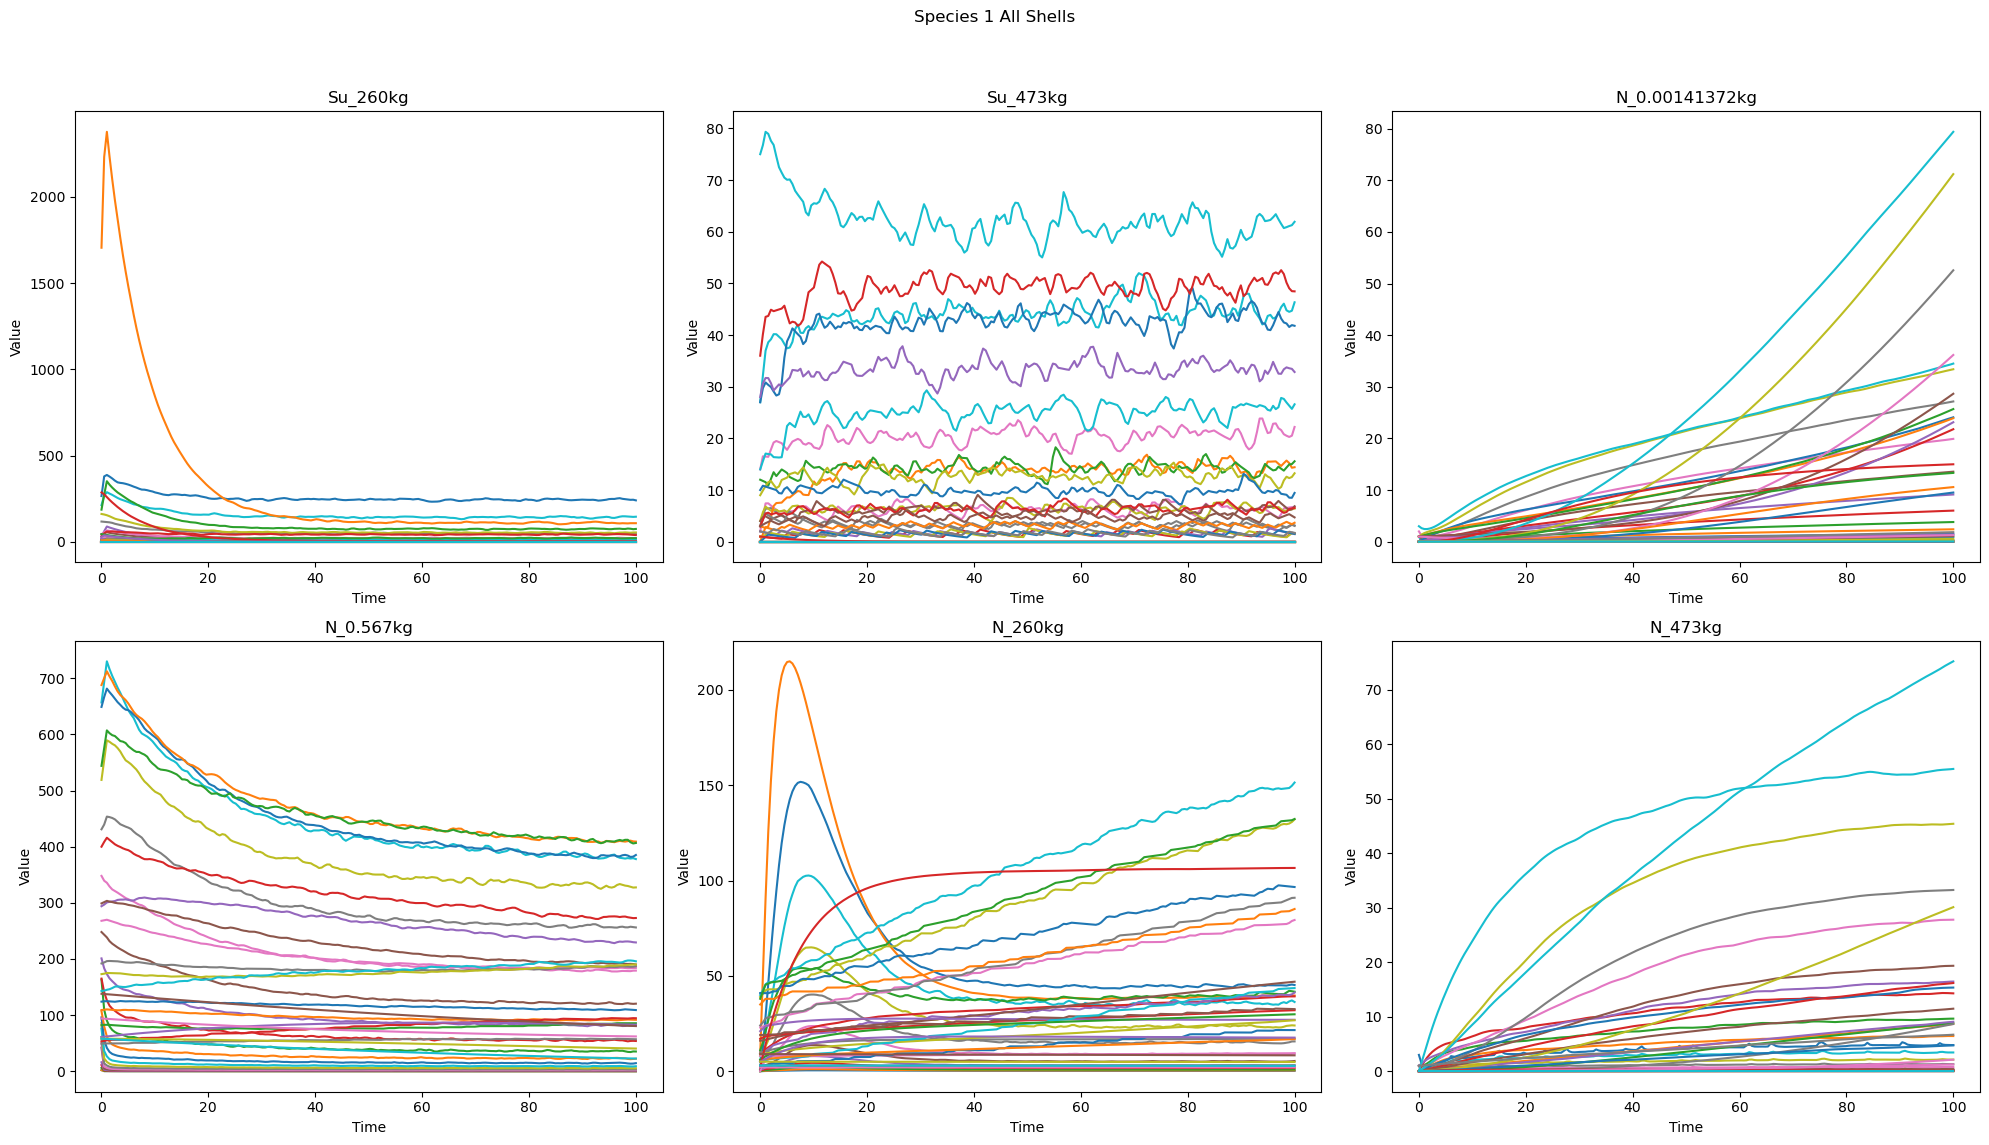

In [7]:
# Assuming 'output.y' has the shape (n_variables, n_time_points) and output.t are the time points
n_species = 6
shells_per_species = 40

# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Adjust the size as needed

# Loop over each species
for species_index in range(n_species):
    ax = axes.flatten()[species_index]  # Get the current axis
    species_data = scenario_properties.output.y[species_index*shells_per_species:(species_index+1)*shells_per_species]

    # Plot each shell for this species
    for shell_index in range(shells_per_species):
        ax.plot(scenario_properties.output.t, species_data[shell_index], label=f'Shell {shell_index+1}')

    # Calculate and plot the sum of all shells for this species
    total = np.sum(species_data, axis=0)
    #ax.plot(output.t, total, label='Total', linestyle='--', color='black')

    # Setting titles and labels
    ax.set_title(f'{scenario_properties.species_names[species_index]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

    # You may need to adjust or disable the legend if it's too crowded
    # ax.legend()

plt.suptitle('Species 1 All Shells')  # Set a super title for the entire figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the super title
plt.show()

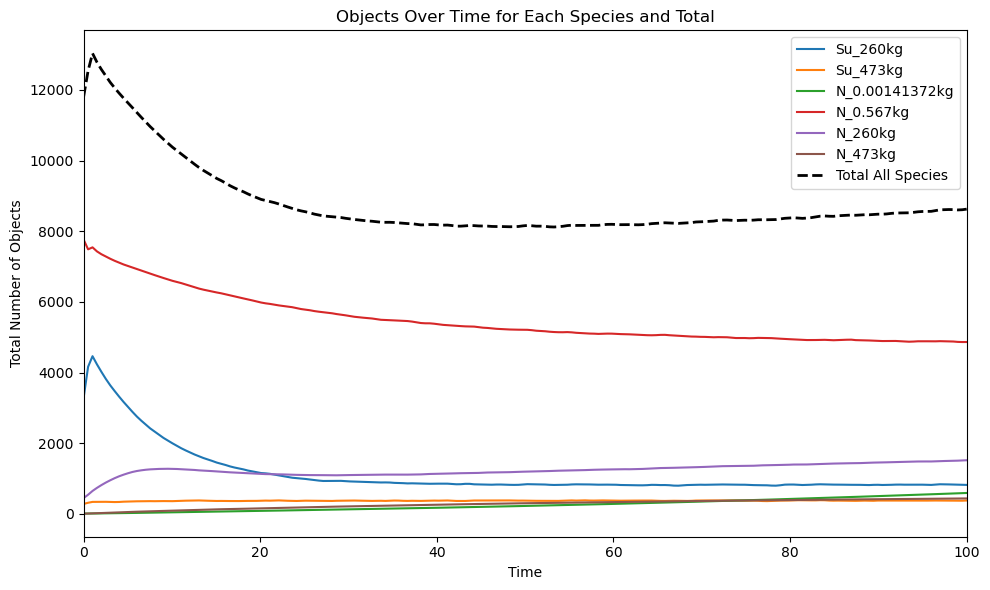

In [8]:
species_names = scenario_properties.species_names

plt.figure(figsize=(10, 6))

# Assuming output.y's shape is (n_variables, n_time_points) and is ordered by species
num_species = len(species_names)
num_shells = 40  # Number of shells per species

# Initialize an array to hold the total number of objects at each time point
total_objects_all_species = np.zeros_like(scenario_properties.output.t)

# Sum and plot for each species, using species names for labels
for i in range(num_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    total_objects_per_species = np.sum(scenario_properties.output.y[start_idx:end_idx, :], axis=0)  # Sum along the vertical axis
    plt.plot(scenario_properties.output.t, total_objects_per_species, label=f'{species_names[i]}')
    
    # Add to the total objects count
    total_objects_all_species += total_objects_per_species

# Plot the total sum line
plt.plot(scenario_properties.output.t, total_objects_all_species, label='Total All Species', color='k', linewidth=2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time for Each Species and Total')
plt.xlim(0, max(scenario_properties.output.t))


plt.legend()
plt.tight_layout()
plt.show()